In [12]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = './data/WEO2023_AnnexA_Free_Dataset_World.csv'
weo_data = pd.read_csv(file_path)

weo_data.head()
maxN=0

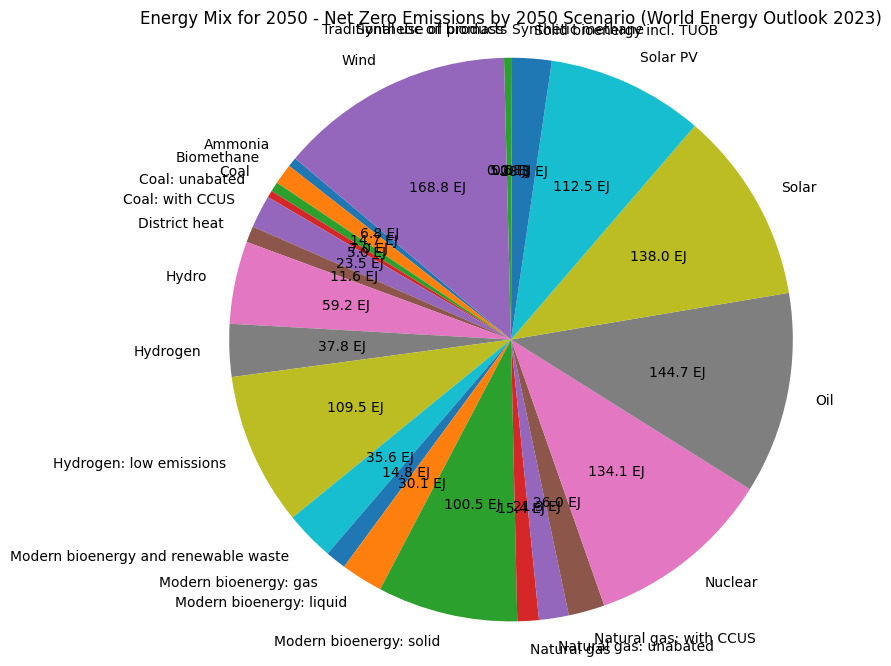

In [13]:
filtered_pie_data_2050 = weo_data[
    (weo_data['PUBLICATION'] == 'World Energy Outlook 2023') &
    (weo_data['SCENARIO'] == 'Net Zero Emissions by 2050 Scenario') &
    (weo_data['CATEGORY'] == 'Energy') &
    (weo_data['PRODUCT'] != 'Total') &
    (weo_data['PRODUCT'] != 'Renewables') &
    (weo_data['PRODUCT'] != 'Electricity') &
    (weo_data['YEAR'] == 2050) &
    (weo_data['REGION'] == 'World') &
    (weo_data['UNIT'] == 'EJ')&
    (~weo_data['PRODUCT'].str.contains('Total'))
]


grouped_2050 = filtered_pie_data_2050.groupby('PRODUCT')['VALUE'].sum().reset_index()

products_2050 = grouped_2050['PRODUCT']
values_2050 = grouped_2050['VALUE']

grouped_products_2050 = []
grouped_values_2050 = []

other_value_2050 = 0

for product, value in zip(products_2050, values_2050):
    if value < maxN: 
        other_value_2050 += value
    else:
        grouped_products_2050.append(product)
        grouped_values_2050.append(value)

if other_value_2050 > 0:
    grouped_products_2050.append('Other (<25 EJ)')
    grouped_values_2050.append(other_value_2050)

plt.figure(figsize=(8, 8))
plt.pie(grouped_values_2050, labels=grouped_products_2050, autopct=lambda p: f'{p * sum(grouped_values_2050) / 100 :.1f} EJ', startangle=140)
plt.title('Energy Mix for 2050 - Net Zero Emissions by 2050 Scenario (World Energy Outlook 2023)')
plt.axis('equal')  

plt.show()

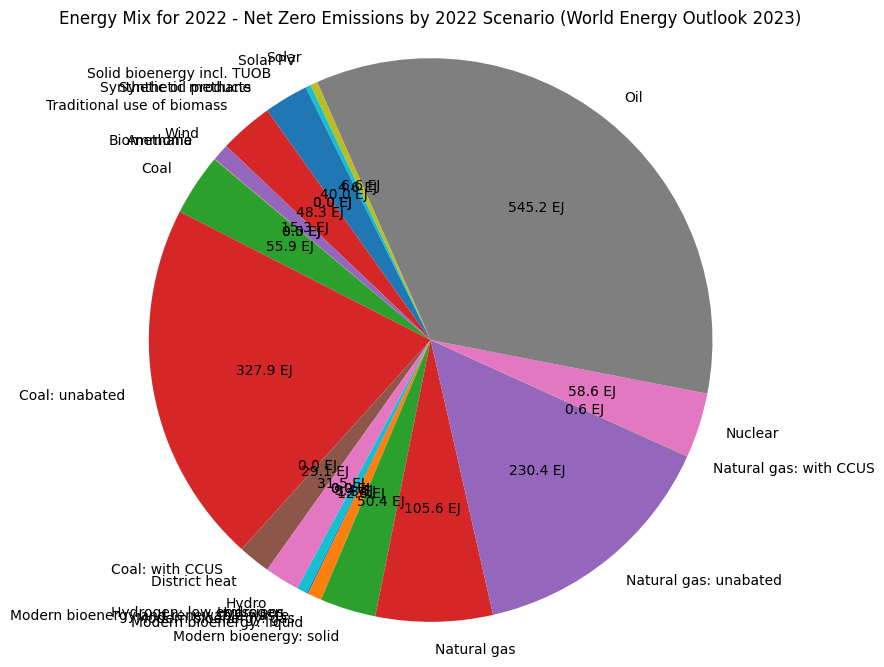

In [14]:
filtered_pie_data_2022 = weo_data[
    (weo_data['PUBLICATION'] == 'World Energy Outlook 2023') &
    (weo_data['SCENARIO'] == 'Net Zero Emissions by 2050 Scenario') &
    (weo_data['CATEGORY'] == 'Energy') &
    (weo_data['PRODUCT'] != 'Total') &
    (weo_data['PRODUCT'] != 'Renewables') &
    (weo_data['PRODUCT'] != 'Electricity') &
    (weo_data['YEAR'] == 2022) &
    (weo_data['REGION'] == 'World') &
    (weo_data['UNIT'] == 'EJ')&
    (~weo_data['PRODUCT'].str.contains('Total'))
]


grouped_2022 = filtered_pie_data_2022.groupby('PRODUCT')['VALUE'].sum().reset_index()

products_2022 = grouped_2022['PRODUCT']
values_2022 = grouped_2022['VALUE']

grouped_products_2022 = []
grouped_values_2022 = []

other_value_2022 = 0

for product, value in zip(products_2022, values_2022):
    if value < maxN:  
        other_value_2022 += value
    else:
        grouped_products_2022.append(product)
        grouped_values_2022.append(value)

if other_value_2022 > 0:
    grouped_products_2022.append('Other (<5 EJ)')
    grouped_values_2022.append(other_value_2022)

plt.figure(figsize=(8, 8))
plt.pie(grouped_values_2022, labels=grouped_products_2022, autopct=lambda p: f'{p * sum(grouped_values_2022) / 100 :.1f} EJ', startangle=140)
plt.title('Energy Mix for 2022 - Net Zero Emissions by 2022 Scenario (World Energy Outlook 2023)')
plt.axis('equal') 

plt.show()

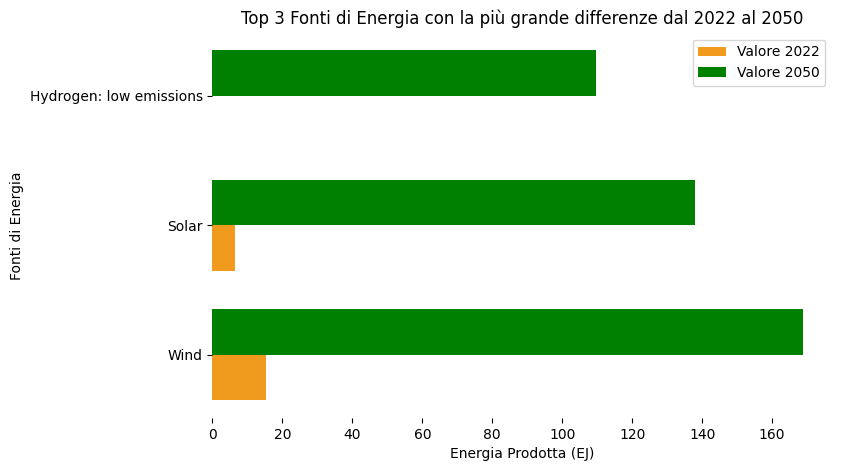

In [15]:
df_2022 = pd.DataFrame({'PRODUCT': grouped_products_2022, 'VALUE_2022': grouped_values_2022})
df_2050 = pd.DataFrame({'PRODUCT': grouped_products_2050, 'VALUE_2050': grouped_values_2050})

merged_data_2022_2050 = pd.merge(df_2022, df_2050, on='PRODUCT', how='outer').fillna(0)
merged_data_2022_2050['DIFFERENCE'] = merged_data_2022_2050['VALUE_2050'] - merged_data_2022_2050['VALUE_2022']

merged_data_2022_2050 = merged_data_2022_2050[merged_data_2022_2050['DIFFERENCE'] > 0]

top_3_data = merged_data_2022_2050.sort_values(by='DIFFERENCE', ascending=False).head(3)

bar_width = 0.35
indices = np.arange(len(top_3_data))

plt.figure(figsize=(8, 5)) 

plt.barh(indices - bar_width/2, top_3_data['VALUE_2022'], height=bar_width, color='#F09B1D', label='Valore 2022')

plt.barh(indices + bar_width/2, top_3_data['VALUE_2050'], height=bar_width, color='green', label='Valore 2050')

plt.yticks(indices, top_3_data['PRODUCT'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.xlabel('Energia Prodotta (EJ)')
plt.ylabel('Fonti di Energia')
plt.title('Top 3 Fonti di Energia con la più grande differenze dal 2022 al 2050')

plt.legend()


plt.show()


In [16]:
df_2022 = pd.DataFrame({'PRODUCT': grouped_products_2022, 'VALUE_2022': grouped_values_2022})
df_2050 = pd.DataFrame({'PRODUCT': grouped_products_2050, 'VALUE_2050': grouped_values_2050})

merged_data_2022_2050 = pd.merge(df_2022, df_2050, on='PRODUCT', how='outer').fillna(0)
merged_data_2022_2050['DIFFERENCE'] = merged_data_2022_2050['VALUE_2050'] - merged_data_2022_2050['VALUE_2022']

merged_data_2022_2050 = merged_data_2022_2050[merged_data_2022_2050['DIFFERENCE'] > 0]

top_3_data = merged_data_2022_2050.sort_values(by='DIFFERENCE', ascending=False).head(3)

for index, row in top_3_data.iterrows():
    print(f"Risorsa: {row['PRODUCT']}")
    print(f"  Valore 2022: {row['VALUE_2022']:.2f} EJ")
    print(f"  Valore 2050: {row['VALUE_2050']:.2f} EJ")
    print(f"  Differenza: {row['DIFFERENCE']:.2f} EJ")
    print()

total_2022 = top_3_data['VALUE_2022'].sum()
total_2050 = top_3_data['VALUE_2050'].sum()

print(f"Totale per il 2022 per le prime 3 risorse: {total_2022:.2f} EJ")
print(f"Totale per il 2050 per le prime 3 risorse: {total_2050:.2f} EJ")



Risorsa: Wind
  Valore 2022: 15.30 EJ
  Valore 2050: 168.78 EJ
  Differenza: 153.48 EJ

Risorsa: Solar
  Valore 2022: 6.60 EJ
  Valore 2050: 138.05 EJ
  Differenza: 131.45 EJ

Risorsa: Hydrogen: low emissions
  Valore 2022: 0.01 EJ
  Valore 2050: 109.52 EJ
  Differenza: 109.51 EJ

Totale per il 2022 per le prime 3 risorse: 21.91 EJ
Totale per il 2050 per le prime 3 risorse: 416.35 EJ
